In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv(r'C:\Users\abc\Data Science and ML\CampusX\Project\self\project_2.csv')

In [3]:
df.sample(2)

,property_type,society,sector,price_in_lacs,price_per_sqft_inrs,area,areaWithType,super_builtup,builtup,carpet_area,...,floorNum,facing,agePossession,furnish_type,servant_room,study room,pooja room,store_room,others,luxury_score
2352,flat,tulip ivory,sector 70,235.0,9791.0,2400.16,Carpet area: 2400 (222.97 sq.m.),NaN,NaN,2400.0,...,10.0,East,Moderately Old,0.0,1,0,0,0,0,60.0
951,flat,paras dews,sector 106,128.0,7272.0,1760.18,Super Built up area 1760(163.51 sq.m.)Built Up...,1760.0,1186.0,1130.0,...,24.0,North-West,Relatively New,0.0,1,0,0,0,0,75.0


In [4]:
df.shape

(3774, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3774 entries, 0 to 3773
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3774 non-null   object 
 1   society              3773 non-null   object 
 2   sector               3774 non-null   object 
 3   price_in_lacs        3774 non-null   float64
 4   price_per_sqft_inrs  3774 non-null   float64
 5   area                 3774 non-null   object 
 6   areaWithType         3774 non-null   object 
 7   super_builtup        1913 non-null   float64
 8   builtup              1702 non-null   float64
 9   carpet_area          1938 non-null   float64
 10  bedRoom              3774 non-null   int64  
 11  bathroom             3774 non-null   int64  
 12  balcony              3774 non-null   object 
 13  floorNum             3755 non-null   float64
 14  facing               2682 non-null   object 
 15  agePossession        3774 non-null   o

# price_in_lacs

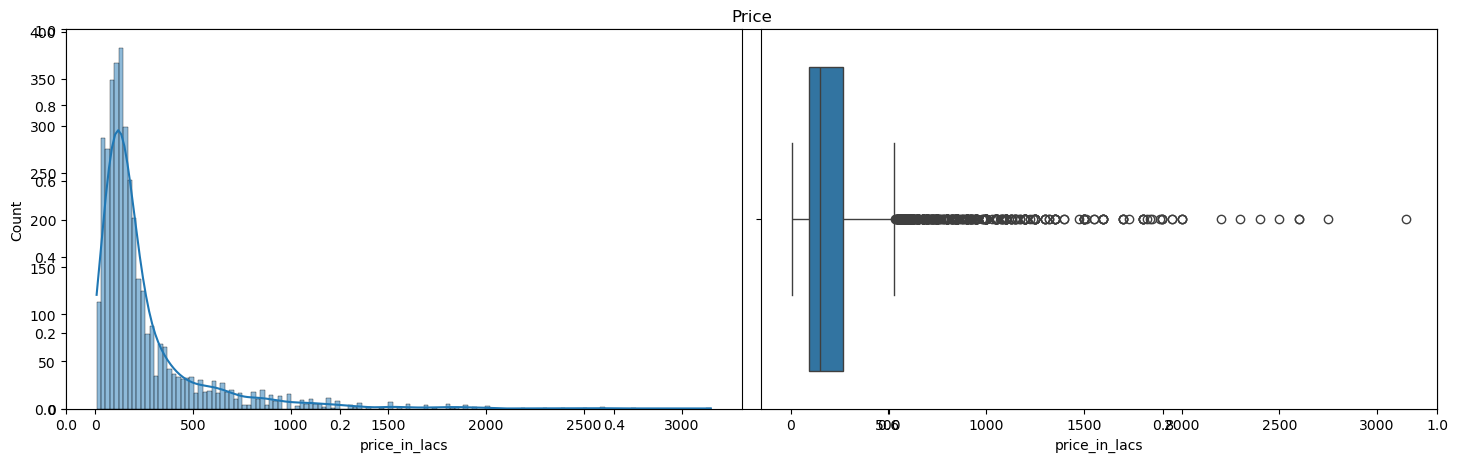

In [6]:
plt.figure(figsize=(15,5))
plt.title('Price')

plt.subplot(1,2,1)
sns.histplot(df['price_in_lacs'],kde=True)

plt.subplot(1,2,2)
sns.boxplot(x=df['price_in_lacs'])

plt.tight_layout()
plt.show()

In [7]:
def plot(i):
    plt.figure(figsize=(15,5))
    plt.title(i)
    
    plt.subplot(1,2,1)
    sns.histplot(df[i],kde=True)
    
    plt.subplot(1,2,2)
    sns.boxplot(x=df[i])
    
    plt.tight_layout()
    plt.show()

    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    min_val=q1-(1.5*iqr)
    max_val=q3+(1.5*iqr)
    print('Min value is:',min_val)
    print('Max value is:',max_val)
    print(df[i].describe())

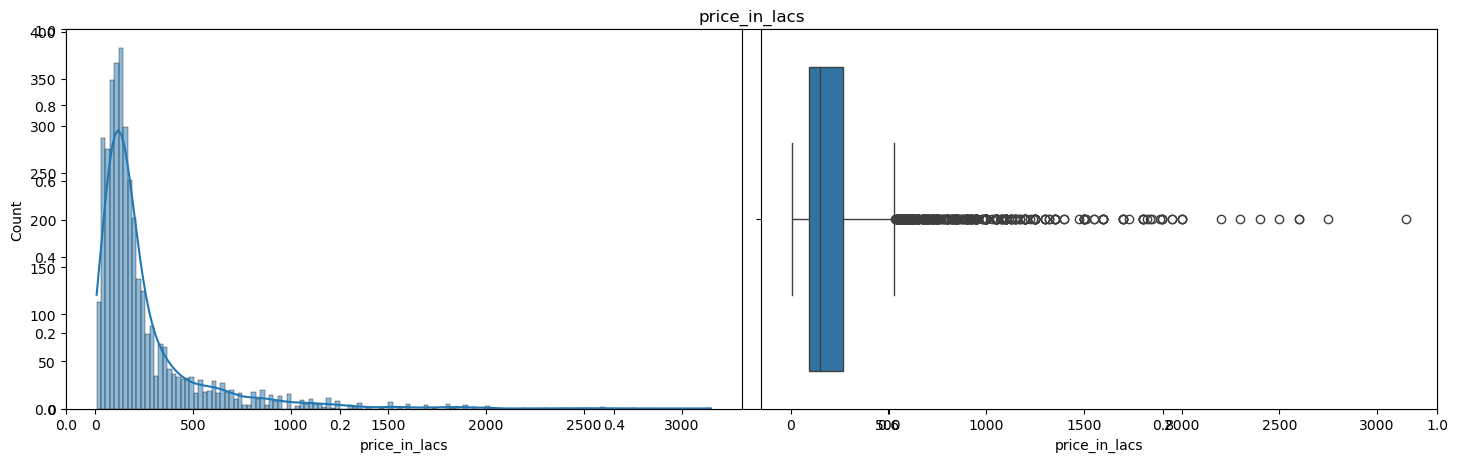

Min value is: -170.0
Max value is: 534.0
count    3774.000000
mean      250.125681
std       294.161396
min         7.500000
25%        94.000000
50%       150.000000
75%       270.000000
max      3150.000000
Name: price_in_lacs, dtype: float64


In [8]:
plot('price_in_lacs')

# Price_per_sqft

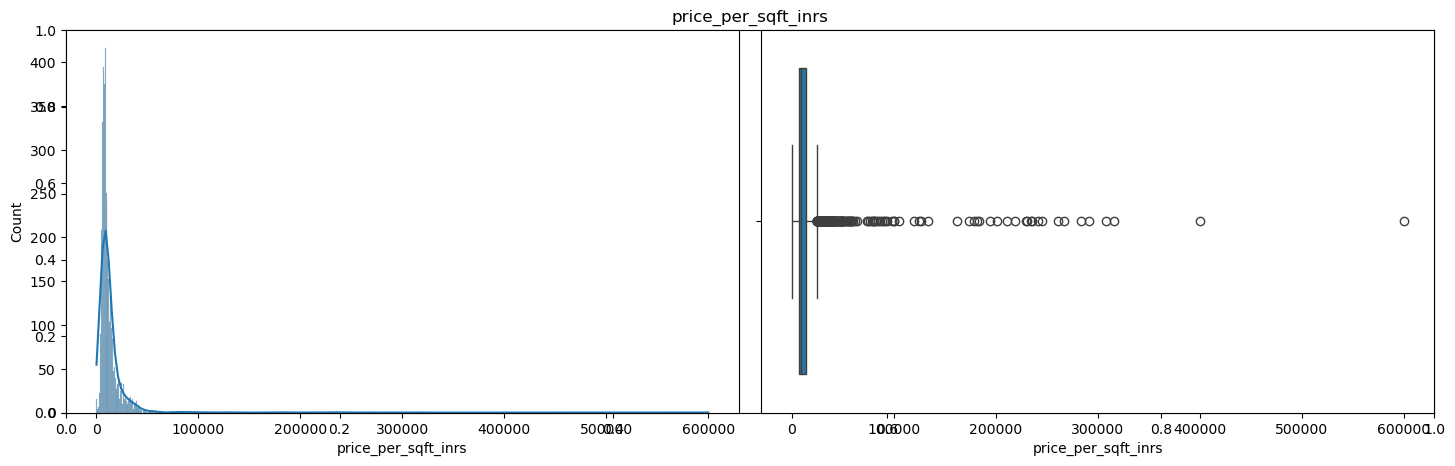

Min value is: -3628.625
Max value is: 24198.375
count      3774.000000
mean      13711.495760
std       22682.341036
min           4.000000
25%        6806.500000
50%        9000.000000
75%       13763.250000
max      600000.000000
Name: price_per_sqft_inrs, dtype: float64


In [9]:
plot('price_per_sqft_inrs')

In [10]:
x=df[(df['price_per_sqft_inrs']<-3628.625)|(df['price_per_sqft_inrs']>24198.375)][['price_in_lacs','price_per_sqft_inrs','area','areaWithType','super_builtup','builtup','carpet_area','bedRoom', 'bathroom', 'balcony']]

In [11]:
import re
def plot_area(row):
    pattern=re.compile(r'.*\((\d+)\s*sq\.m\.?\)\s*(plot area|built-up area|carpet area).*')
    matches=re.finditer(pattern,row)
    for match in matches:
        return match.group(1)

In [12]:
idx=df['area'][df['property_type']=='house'].str.strip().str.lower().apply(plot_area).index
val=df['area'][df['property_type']=='house'].str.strip().str.lower().apply(plot_area).astype('int').values*10.76

In [13]:
df['area'][idx]=val

C:\Users\abc\AppData\Local\Temp\ipykernel_5700\791219452.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['area'][idx]=val
C:\Users\abc\AppData\Local\Temp\ipykernel_5700\791219452.py:1: SettingWithCopyWarning: 
A value is trying to be 

In [14]:
df['area']=df['area'].astype('float')

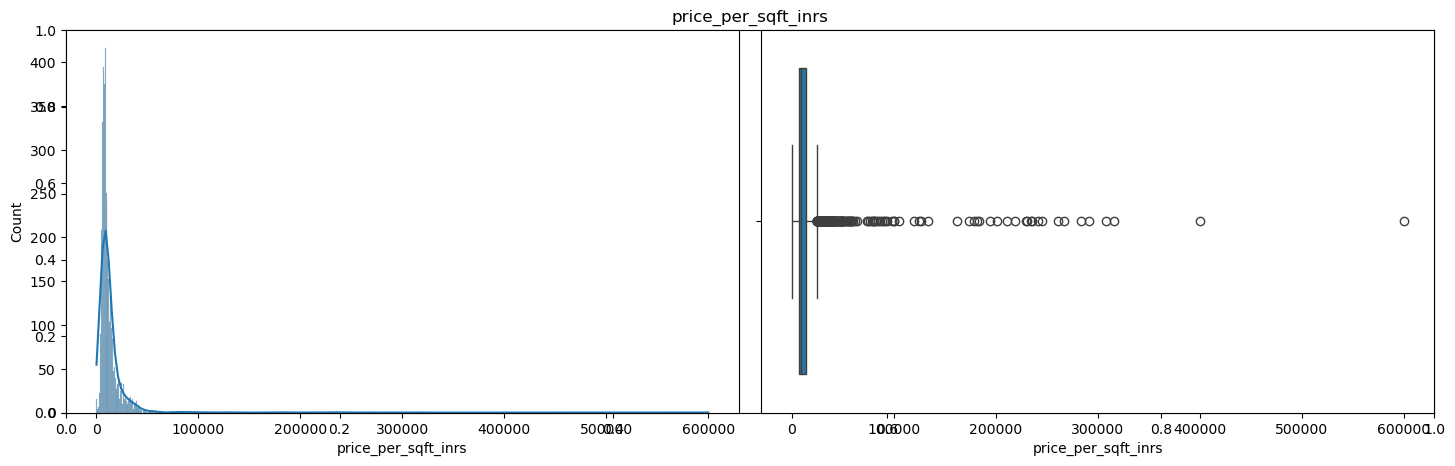

Min value is: -3628.625
Max value is: 24198.375
count      3774.000000
mean      13711.495760
std       22682.341036
min           4.000000
25%        6806.500000
50%        9000.000000
75%       13763.250000
max      600000.000000
Name: price_per_sqft_inrs, dtype: float64


In [15]:
plot('price_per_sqft_inrs')

In [16]:
df=df[df['price_per_sqft_inrs']<=50000]

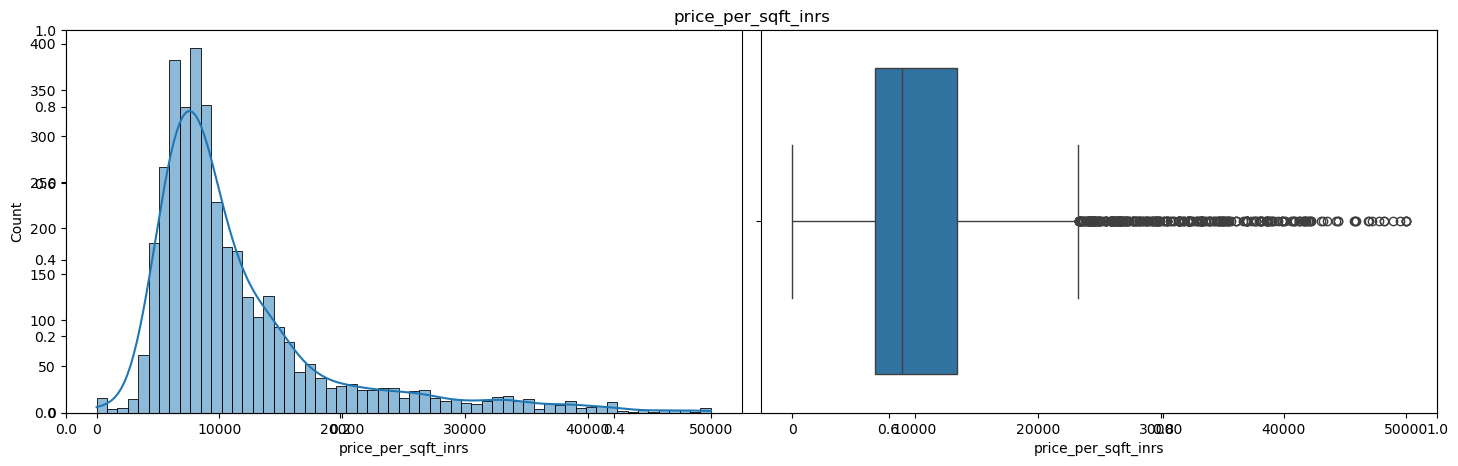

Min value is: -3153.0
Max value is: 23319.0
count     3713.000000
mean     11560.966335
std       7738.951077
min          4.000000
25%       6774.000000
50%       8922.000000
75%      13392.000000
max      50000.000000
Name: price_per_sqft_inrs, dtype: float64


In [17]:
plot('price_per_sqft_inrs')

# area

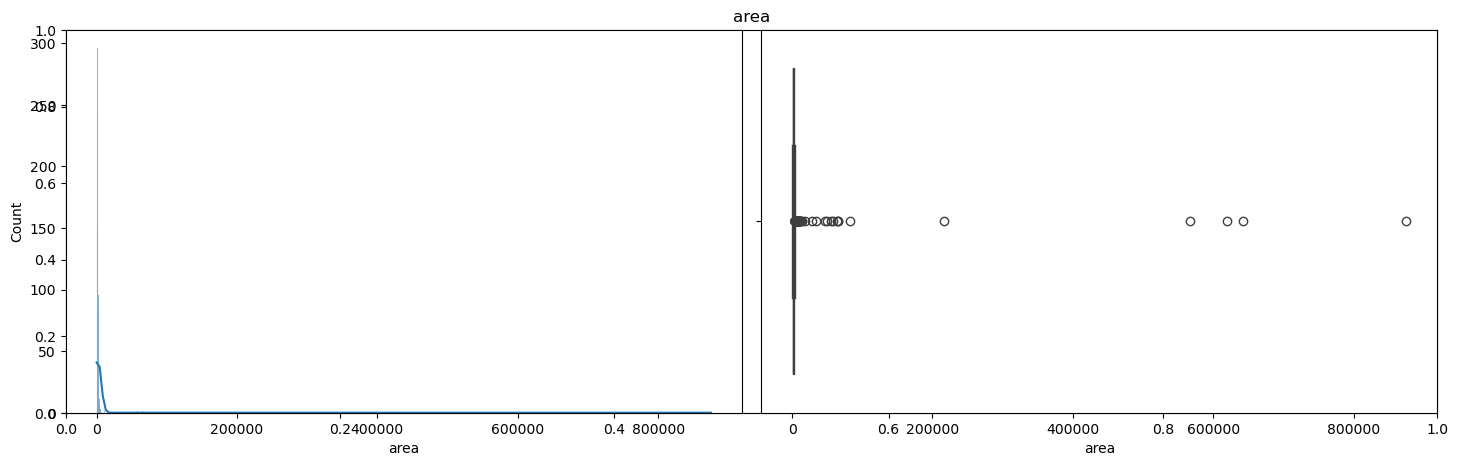

Min value is: -332.7849999999996
Max value is: 3875.0949999999993
count      3713.000000
mean       2832.549259
std       22934.735763
min          72.000000
25%        1245.170000
50%        1732.360000
75%        2297.140000
max      875000.000000
Name: area, dtype: float64


In [18]:
plot('area')

In [19]:
df = df[df['area'] < 100000]

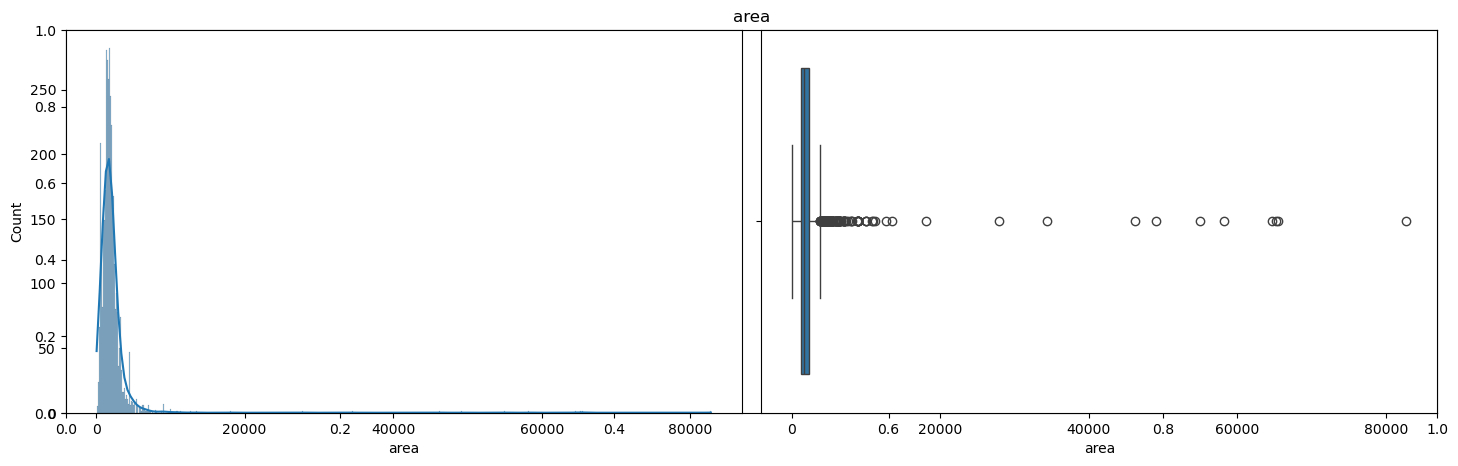

Min value is: -323.9100000000001
Max value is: 3860.1900000000005
count     3708.000000
mean      2048.771022
std       3104.898456
min         72.000000
25%       1245.127500
50%       1732.360000
75%       2291.152500
max      82765.920000
Name: area, dtype: float64


In [20]:
plot('area')

In [68]:
df[df['area'] > 10000].sort_values('area',ascending=False).iloc[:,:15]

,property_type,society,sector,price_in_lacs,price_per_sqft_inrs,area,areaWithType,super_builtup,builtup,carpet_area,bedRoom,bathroom,balcony,floorNum,facing
3467,house,independent,sector 43,2750.0,24366.0,11287.24,Plot area 1254(1048.5 sq.m.),NaN,1254.0,NaN,6,7,3+,3.0,North-East
1620,flat,m3m golfestate,sector 65,1320.0,12000.0,11000.00,Carpet area: 11000 (1021.93 sq.m.),NaN,NaN,11000.0,4,4,3,13.0,North
3402,house,independent,sohna road road,550.0,5093.0,10792.28,Plot area 1200(1003.35 sq.m.)Built Up area: 35...,NaN,3500.0,NaN,3,3,3+,2.0,West


In [21]:
df.loc[3207,'area']=115*9

In [27]:
df.loc[3207,'price_per_sqft_inrs']=round((df.loc[3207,'price_in_lacs']*100000)/df.loc[3207,'area'])

In [29]:
df.loc[3278,'area']=7250 
df.loc[3278,'price_per_sqft_inrs']=round((df.loc[3278,'price_in_lacs']*100000)/df.loc[3278,'area'])

In [31]:
df.drop(index=[1291],inplace=True)

In [33]:
df.drop(index=[1796],inplace=True)

In [35]:
df.drop(index=[2302],inplace=True)

In [37]:
df.drop(index=[78],inplace=True)

In [39]:
df.drop(index=[1290],inplace=True)

In [41]:
df.drop(index=[1413],inplace=True)

In [43]:
df.drop(index=[1287],inplace=True)

In [45]:
df.drop(index=[1292],inplace=True)

In [47]:
df.loc[3038,'area']=2660 
df.loc[3038,'price_per_sqft_inrs']=round((df.loc[3038,'price_in_lacs']*100000)/df.loc[3038,'area'])

In [49]:
df.loc[2396,'area']=1812 
df.loc[2396,'price_per_sqft_inrs']=round((df.loc[2396,'price_in_lacs']*100000)/df.loc[2396,'area'])

In [64]:
df.drop(index=[3031],inplace=True)

In [66]:
df.loc[2792,'area']=1175 
df.loc[2792,'price_per_sqft_inrs']=round((df.loc[2792,'price_in_lacs']*100000)/df.loc[2792,'area'])

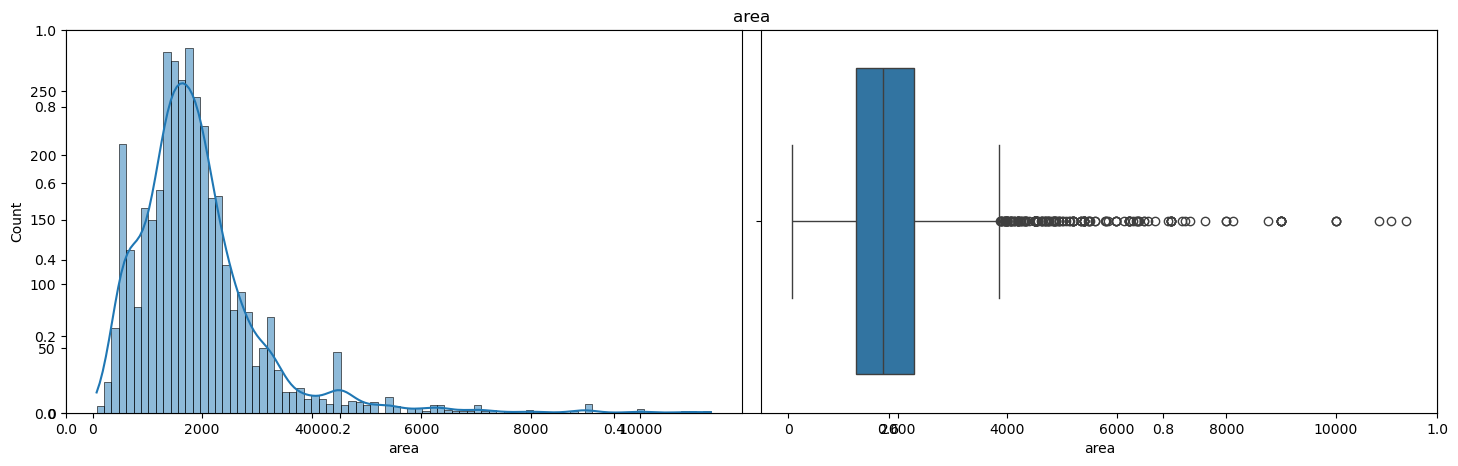

Min value is: -322.5599999999995
Max value is: 3857.7199999999993
count     3699.000000
mean      1896.739521
std       1148.788674
min         72.000000
25%       1245.045000
50%       1730.100000
75%       2290.115000
max      11287.240000
Name: area, dtype: float64


In [70]:
plot('area')

# BedRoom

In [72]:
df['bedRoom'].value_counts()

bedRoom
3     1533
2      971
4      660
5      192
1      126
6       69
9       37
7       28
8       27
12      22
10      18
16       7
13       2
18       2
19       2
20       1
21       1
11       1
Name: count, dtype: int64

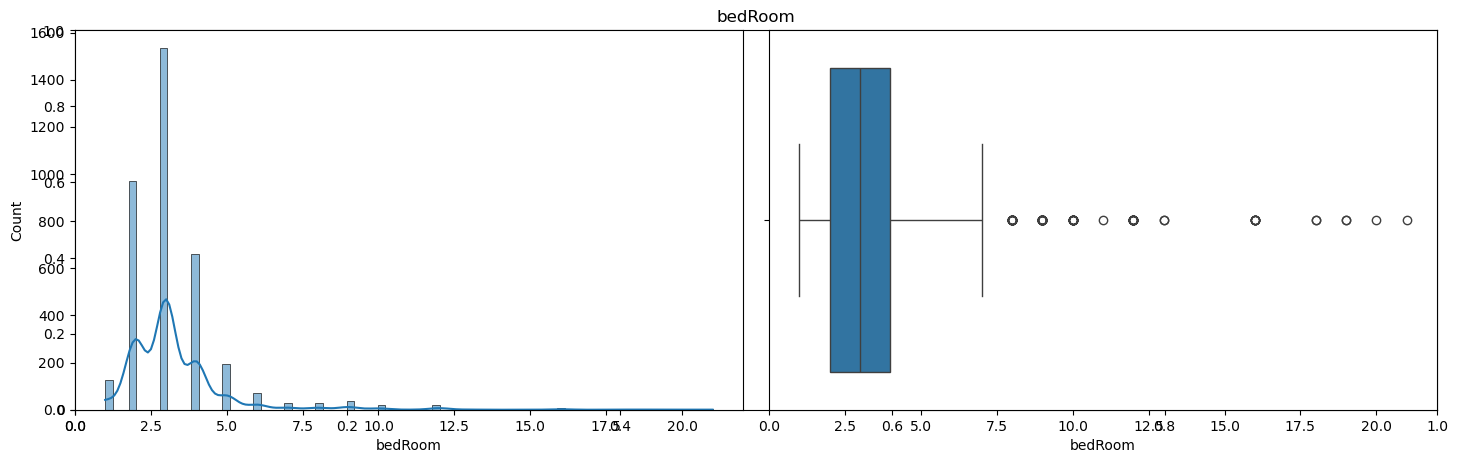

Min value is: -1.0
Max value is: 7.0
count    3699.000000
mean        3.280346
std         1.753794
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedRoom, dtype: float64


In [73]:
plot('bedRoom')

In [78]:
df[df['bedRoom']>10].iloc[:,:15].sample(5)

,property_type,society,sector,price_in_lacs,price_per_sqft_inrs,area,areaWithType,super_builtup,builtup,carpet_area,bedRoom,bathroom,balcony,floorNum,facing
2944,house,dlf city plots phase 3,sector 24,500.0,34083.0,1463.36,Plot area 163(136.29 sq.m.),NaN,163.0,NaN,13,13,3+,4.0,North
3040,house,independent,sector 11,450.0,25000.0,1796.92,Plot area 200(167.23 sq.m.),NaN,200.0,NaN,16,16,3+,4.0,South
3625,house,independent,sector 54,550.0,38194.0,1441.84,Plot area 160(133.78 sq.m.),NaN,160.0,NaN,18,18,3+,4.0,South-West
2937,house,independent,sector 43,450.0,39062.0,1151.32,Plot area 128(107.02 sq.m.),NaN,128.0,NaN,20,20,3+,4.0,East
3479,house,independent,sector 46,650.0,27461.0,2367.20,Plot area 263(219.9 sq.m.),NaN,263.0,NaN,12,12,3+,4.0,North-West


In [79]:
df.shape

(3699, 23)

In [81]:
df=df[df['bedRoom']<10]

In [82]:
df.shape

(3643, 23)

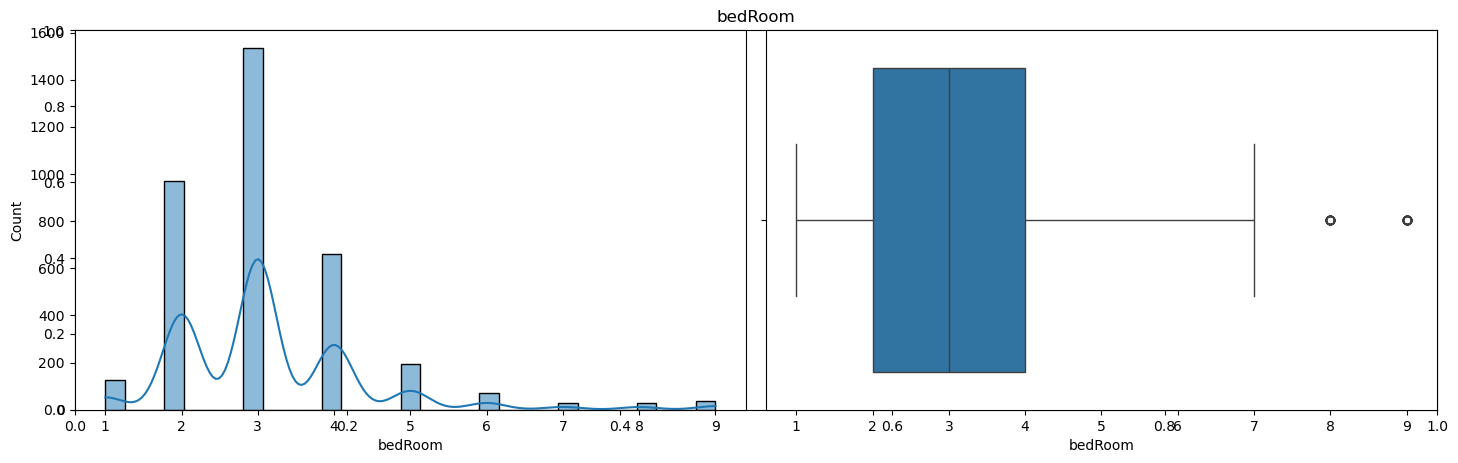

Min value is: -1.0
Max value is: 7.0
count    3643.000000
mean        3.136426
std         1.273995
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         9.000000
Name: bedRoom, dtype: float64


In [83]:
plot('bedRoom')

# bathroom

In [85]:
df['bathroom'].value_counts()

bathroom
3     1095
2     1083
4      821
5      286
1      153
6      112
9       36
7       34
8       21
11       1
12       1
Name: count, dtype: int64

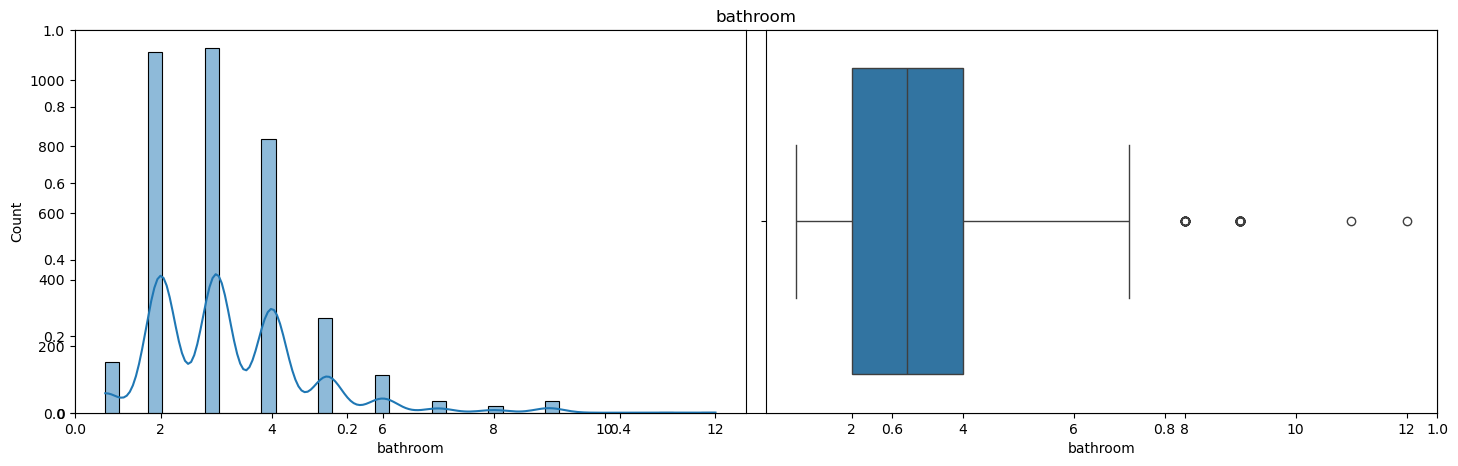

Min value is: -1.0
Max value is: 7.0
count    3643.000000
mean        3.223442
std         1.385985
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        12.000000
Name: bathroom, dtype: float64


In [86]:
plot('bathroom')

# super_builtup

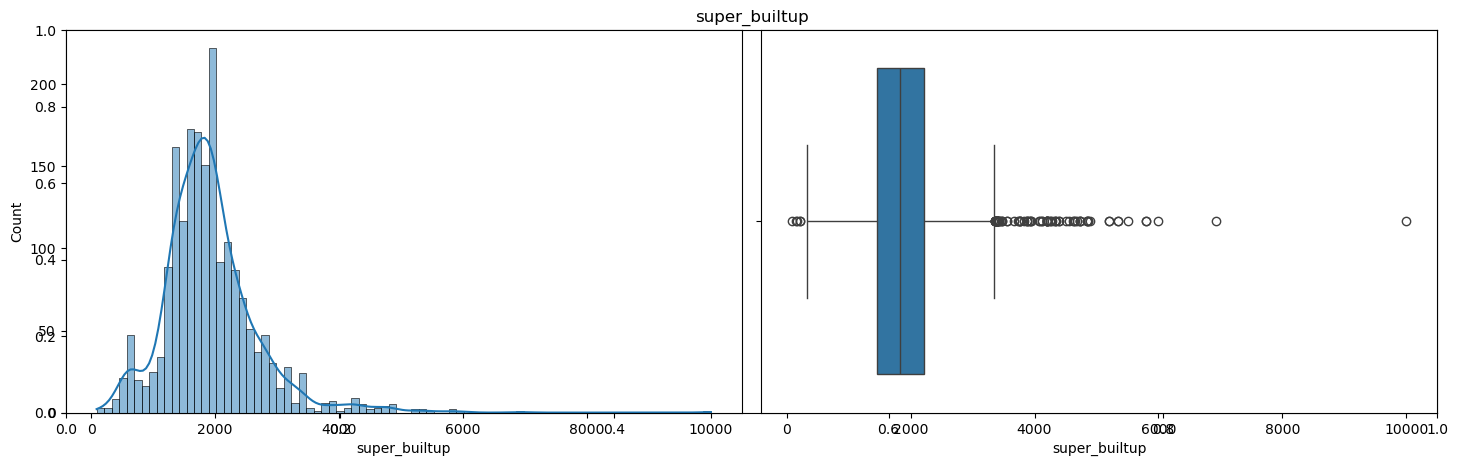

Min value is: 320.0
Max value is: 3352.0
count     1912.000000
mean      1922.111402
std        767.354966
min         89.000000
25%       1457.000000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_builtup, dtype: float64


In [88]:
plot('super_builtup')

# builtup

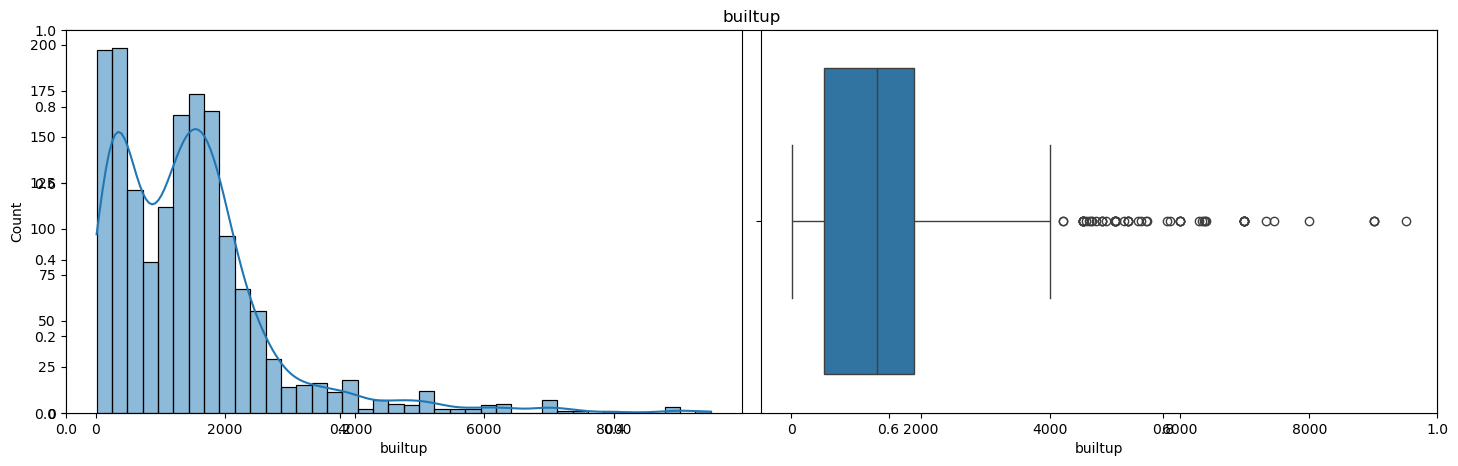

Min value is: -1600.0
Max value is: 4000.0
count    1589.000000
mean     1446.691001
std      1237.389272
min        14.000000
25%       500.000000
50%      1326.000000
75%      1900.000000
max      9500.000000
Name: builtup, dtype: float64


In [89]:
plot('builtup')

# carpet_area

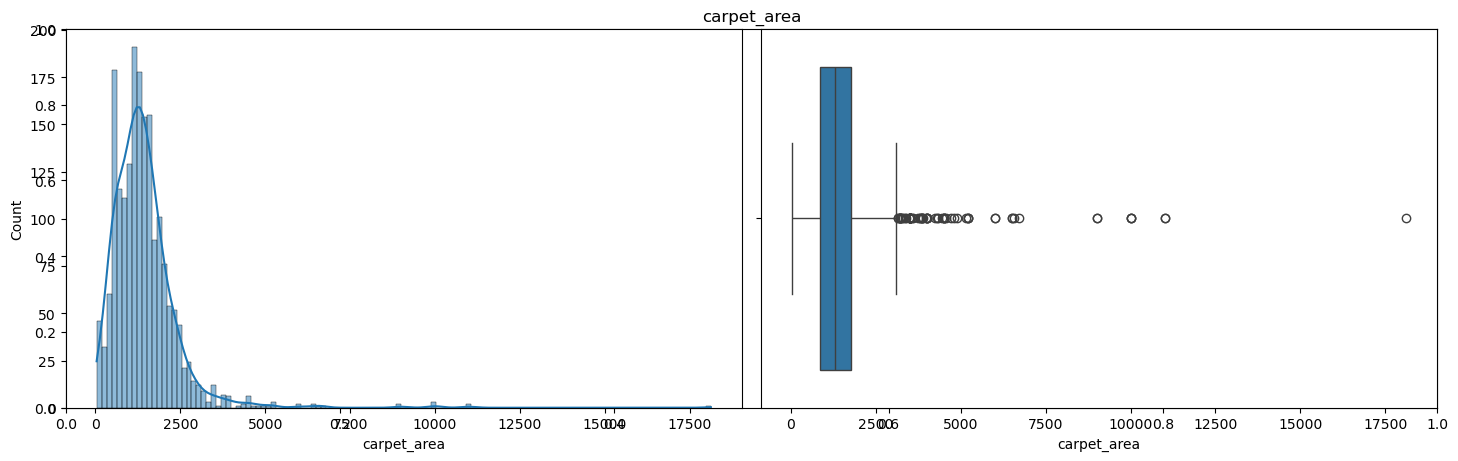

Min value is: -530.5
Max value is: 3137.5
count     1906.000000
mean      1428.749738
std       1039.891962
min         33.000000
25%        845.000000
50%       1294.500000
75%       1762.000000
max      18122.000000
Name: carpet_area, dtype: float64


In [90]:
plot('carpet_area')

In [93]:
df.loc[2396,'carpet_area']=1812

# luxury_score

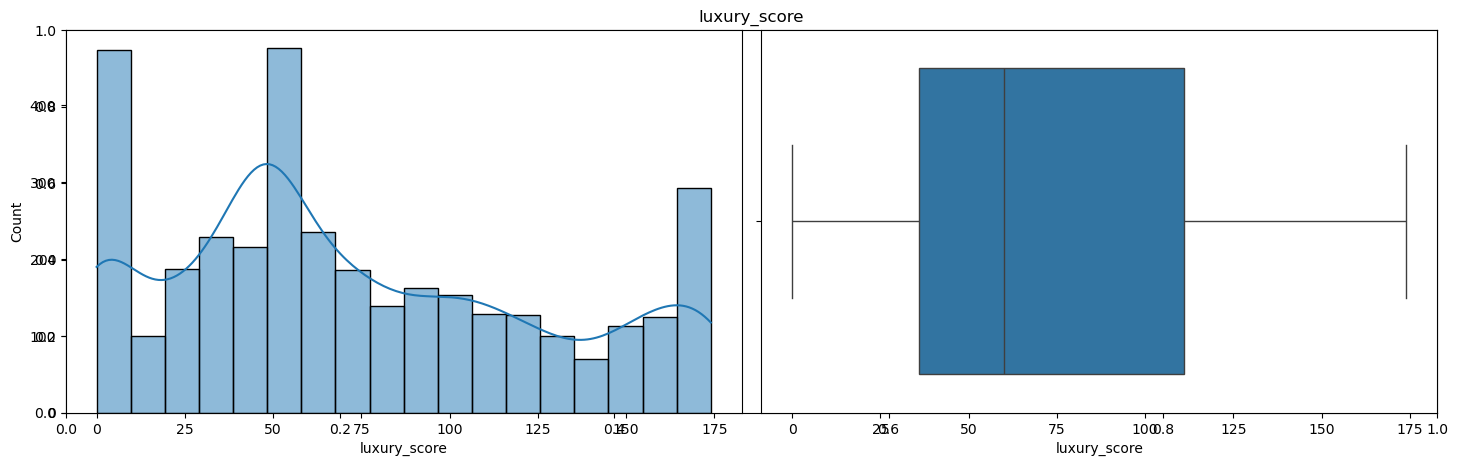

Min value is: -76.5
Max value is: 223.5
count    3505.000000
mean       73.182882
std        52.686091
min         0.000000
25%        36.000000
50%        60.000000
75%       111.000000
max       174.000000
Name: luxury_score, dtype: float64


In [94]:
plot('luxury_score')

# price_per_sqft_inrs

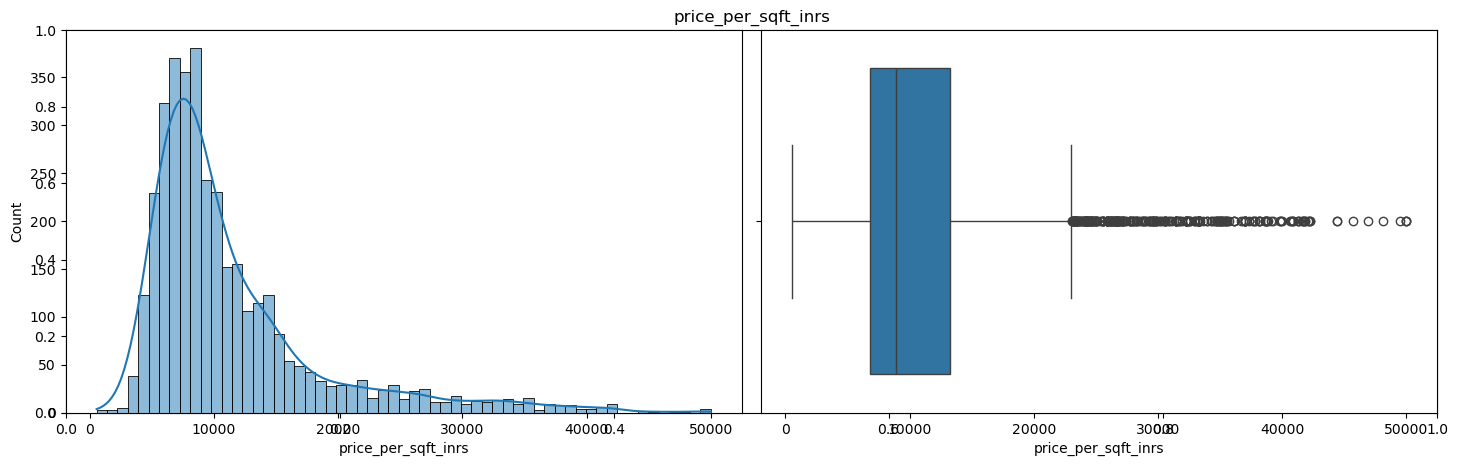

Min value is: -2987.75
Max value is: 23054.25
count     3643.000000
mean     11353.288224
std       7239.627648
min        544.000000
25%       6778.000000
50%       8903.000000
75%      13288.500000
max      50000.000000
Name: price_per_sqft_inrs, dtype: float64


In [95]:
plot('price_per_sqft_inrs')

In [98]:
df[df['price_per_sqft_inrs'] > 42000].iloc[:,0:15]

,property_type,society,sector,price_in_lacs,price_per_sqft_inrs,area,areaWithType,super_builtup,builtup,carpet_area,bedRoom,bathroom,balcony,floorNum,facing
2248,flat,breez global hill view,sohna road,260.0,46917.0,554.17,Carpet area: 554.16 (51.48 sq.m.),NaN,NaN,554.0,2,2,2,6.0,NaN
2873,flat,lig flat,sector 40,150.0,50000.0,300.00,Built Up area: 300 (27.87 sq.m.),NaN,300.0,NaN,1,1,0,0.0,NaN
3151,house,independent,sector 105,50.0,50000.0,96.84,Built Up area: 100 (9.29 sq.m.),NaN,100.0,NaN,2,2,0,1.0,NaN
3218,house,shree krishna homes,sector 104,48.0,50000.0,75.32,Plot area 80(7.43 sq.m.)Built Up area: 795 sq....,NaN,795.0,720.0,2,2,1,1.0,North-East
3336,house,independent,sector 25,1300.0,45710.0,2840.64,Plot area 316(264.22 sq.m.),NaN,316.0,NaN,6,8,3+,NaN,NaN
3377,house,independent,sector 105,990.0,49500.0,2001.36,Built Up area: 2000 (185.81 sq.m.)Carpet area:...,NaN,2000.0,1800.0,2,2,2,3.0,North
3452,house,dlf city plots,sector 26,1900.0,42054.0,4519.20,Plot area 502(419.74 sq.m.),NaN,502.0,NaN,6,6,3,2.0,East
3541,house,independent,sector 28,1200.0,42194.0,2840.64,Plot area 316(264.22 sq.m.),NaN,316.0,NaN,4,5,3+,4.0,East
3546,house,independent,sector 26,2000.0,44444.0,4497.68,Plot area 500(418.06 sq.m.),NaN,500.0,NaN,5,7,3+,3.0,West
3624,house,independent,sector 26,1900.0,42222.0,4497.68,Plot area 500(418.06 sq.m.),NaN,500.0,NaN,6,8,3+,3.0,East


In [100]:
x = df[df['price_per_sqft_inrs'] <= 20000]
(x['area']/x['bedRoom']).quantile(0.02)

198.96256

In [102]:
df[(df['area']/df['bedRoom'])<(x['area']/x['bedRoom']).quantile(0.02)].iloc[:,0:15]

,property_type,society,sector,price_in_lacs,price_per_sqft_inrs,area,areaWithType,super_builtup,builtup,carpet_area,bedRoom,bathroom,balcony,floorNum,facing
115,flat,czar mahira homes 63a,sector 63a,42.0,7407.0,567.03,Carpet area: 567 (52.68 sq.m.),NaN,NaN,567.0,3,2,2,1.0,NaN
2079,flat,housing board colony,sector 51,30.0,41666.0,72.00,Carpet area: 72 (6.69 sq.m.),NaN,NaN,72.0,1,1,0,0.0,NaN
2948,house,independent,sector 38,210.0,23333.0,903.84,Plot area 100(83.61 sq.m.),NaN,100.0,NaN,7,7,3+,3.0,North-East
3002,house,international city by sobha phase 1,sector 109,575.0,16428.0,269.00,Plot area 272(25.27 sq.m.)Built Up area: 4800 ...,NaN,4800.0,3500.0,4,4,2,3.0,South-East
3042,house,independent,sector 43,250.0,25960.0,957.64,Plot area 107(89.47 sq.m.),NaN,107.0,NaN,7,7,3,4.0,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3694,house,sushant lok 1 builder floors,sector 43,165.0,30556.0,538.00,Plot area 60(50.17 sq.m.)Built Up area: 540 sq...,NaN,540.0,500.0,4,4,3+,4.0,West
3738,house,sector 57 huda,sector 57,380.0,26063.0,1452.60,Plot area 162(135.45 sq.m.)Built Up area: 162 ...,NaN,162.0,160.0,8,8,3+,4.0,East
3740,house,sector 38 rwa,sector 38,140.0,23932.0,581.04,Plot area 65(54.35 sq.m.)Built Up area: 62 sq....,NaN,62.0,60.0,8,8,3,4.0,East
3750,house,sector 38 rwa,sector 38,430.0,28782.0,1495.64,Plot area 166(138.8 sq.m.)Built Up area: 165 s...,NaN,165.0,164.0,9,9,3+,3.0,East


In [105]:
df.to_csv(r'C:\Users\abc\Data Science and ML\CampusX\Project\self\project_3.csv',index=False)